## Exercise Set 1 for OSM 

### Dynamic Programming with John Stachurski

This notebook contains the first set of exercises for the [OSM](https://bfi.uchicago.edu/osm) bootcamp dynamic programming section.

We will use the following libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1

Consider the data

In [2]:
A = [[0.6, 0.1, -0.3],
     [0.5, -0.4, 0.2],
     [1.0, -0.2, 1.1]]

b = [[12],
     [10],
     [-1]]

A, b = map(np.asarray, (A, b))

The equation $x = A x + b$ has a unique solution in $\mathbb R^3$.  Show that this is true by checking the spectral radius condition.

In [3]:
from scipy.linalg import eigvals, solve
evs = eigvals(A)
ρ = max(abs(evs))
print(ρ)

0.965538166352


### Justification: 


Since ρ < 1, by spectral radius conditions there is convergence to the unique fixed point.

Compute the solution using both successive approximations --- that is,

$$ x_{t+1} = A x_t + b $$

and matrix algebra.

Comparison 

In [4]:
I = np.identity(3)
x = np.linalg.inv(I-A)@b
print("Matrix algebra: " + str(x))


x = np.array([[0], [0], [0]])
equal = False

i = 0
while i < 1000 :
    x = np.dot(A, x) + b
    i += 1

print("Successive approximations: " + str(x))


Matrix algebra: [[ -0.89552239]
 [ 13.34328358]
 [ 45.64179104]]
Successive approximations: [[ -0.89552239]
 [ 13.34328358]
 [ 45.64179104]]


As expected, the result is the same.

### Exercise 2

In a standard job search model, an agent 


* receives offer $w_t$ in period $t$ where $\{w_t\}$ is  iid
* accepts this offer at time $t$ or remains unemployed
    *  if remains unemployed, then receives compensation $c > 0$
    * if accepts, then works indefinitely at this wage

The agent discounts the future at rate $\beta \in (0, 1)$


It can be shown that the following is an optimal strategy: 

* Set a reservation wage $\bar w$
* Accept the first offer $w_t$ such that $w_t \geq \bar w$


It can also be shown (details omitted) that $\bar w$ should satisfy

$$
    \bar w
    = c (1-\beta) + \beta
    \sum_{k=1}^K \max \left\{
        w_k ,\, \bar w
    \right\}
    \, p_k
$$

Here 

* $w_1, \ldots, w_K$ are the possible wage values, occuring with probabilities $p_1, \ldots, p_K$
* $c > 0$

Does there always exists a $x \in [0, \infty)$ that solves the equation
$$
    x
    = c (1-\beta) + \beta
    \sum_{k=1}^K \max \left\{
        w_k ,\, x
    \right\}
    \, p_k
$$
Is it unique?  Suggest a strategy for computing it

#### Hints

There are different ways to show this, but I found the following facts useful:

*  If $x_1, \ldots, x_K$ are any $K$ numbers, then

$$ \left| \sum_{k=1}^K x_k \right| \leq \sum_{k=1}^K |x_k| $$

* For any $a, x, y$ in $\mathbb R$, 
    
$$ 
    \left| 
            \max \left\{ a,\, x \right\} - \max \left\{ a,\, y \right\} 
        \right|
        \leq | x - y |
$$


You can convince yourself of the second inequality by sketching and checking different cases...

##  Proof in Exercises file

### Exercise 3

Let 

* $\beta = 0.96$
* $(w_1, w_2, w_3) = (0.5, 1.0, 1.5)$
* $(p_1, p_2, p_3) = (0.2, 0.4, 0.4)$

Compute and plot the reservation wage for unemployment compensation values

## Computation and plot:

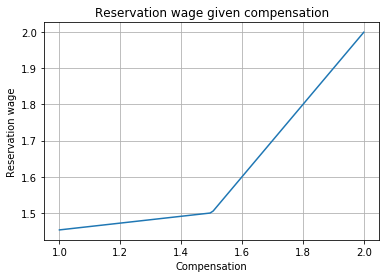

In [5]:
import numpy as np
import matplotlib.pyplot as plt

c_vals = np.linspace(1, 2, 100)
w_vals = np.ones((100))
w1 = 0.5
w2 = 1.0
w3 = 1.5
ws = np.array([w1, w2, w3])

p1 = 0.2
p2 = 0.4
p3 = 0.4
ps = np.array([p1, p2, p3])

tol = 1e-12
beta = 0.96

w_vals = []
for c in c_vals:
    w = 1
    error = 1
    i = 0
    while error > tol:
        wp = c*(1-beta) + sum([beta*ps[i]*max(ws[i], w) for i in range(3)])
        error = abs(w - wp)
        w = wp
    w_vals.append(round(w, 8))
    
plt.plot(c_vals, w_vals)
plt.title("Reservation wage given compensation")
plt.ylabel("Reservation wage")
plt.xlabel("Compensation")
plt.grid()
plt.show()


Is the reservation wage increasing or decreasing in this value?  Does that coincide with your intuition?

### Answer:


The reservation wage is increasing in the compensation value, which is intuitive, since the loss in utility incurred by foregoing work is smaller the greater the compensation is. In short, the agent has a higher wage to fall back on, and is thus less likely to accept an ill-paying job.